# Task 1 Massive Data Processing

# Crypto Currency Price History

In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/raw/bitcoin_cash_price.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",514.90,550.95,458.78,541.71,"338,978,000","8,527,100,000"
1,"Sep 04, 2017",608.26,608.26,500.75,517.24,"328,957,000","10,072,200,000"
2,"Sep 03, 2017",578.27,617.41,563.59,607.43,"344,862,000","9,574,520,000"
3,"Sep 02, 2017",621.96,642.05,560.58,575.90,"350,478,000","10,297,000,000"
4,"Sep 01, 2017",588.40,645.52,586.73,622.17,"393,839,000","9,740,460,000"


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
40,"Jul 27, 2017",417.10,460.97,367.78,385.48,"533,207",-
41,"Jul 26, 2017",407.08,486.16,321.79,365.82,"1,784,640",-
42,"Jul 25, 2017",441.35,541.66,338.09,406.90,"524,908",-
43,"Jul 24, 2017",412.58,578.89,409.21,440.70,"190,952",-
44,"Jul 23, 2017",555.89,578.97,411.78,413.06,"85,013",-


In [6]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].replace('-', 'NaN')
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 


In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
40,"Jul 27, 2017",417.10,460.97,367.78,385.48,533207.0,NaN
41,"Jul 26, 2017",407.08,486.16,321.79,365.82,1784640.0,NaN
42,"Jul 25, 2017",441.35,541.66,338.09,406.90,524908.0,NaN
43,"Jul 24, 2017",412.58,578.89,409.21,440.70,190952.0,NaN
44,"Jul 23, 2017",555.89,578.97,411.78,413.06,85013.0,NaN


In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",514.90,550.95,458.78,541.71,338978000.0,8.527100e+09
1,"Sep 04, 2017",608.26,608.26,500.75,517.24,328957000.0,1.007220e+10
2,"Sep 03, 2017",578.27,617.41,563.59,607.43,344862000.0,9.574520e+09
3,"Sep 02, 2017",621.96,642.05,560.58,575.90,350478000.0,1.029700e+10
4,"Sep 01, 2017",588.40,645.52,586.73,622.17,393839000.0,9.740460e+09


In [9]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
dtype: object

In [10]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    10
dtype: int64

There are some missing value in Market Cap coulumn, so here I try to interpolate the data, using data statistical for example median and mean

In [69]:
# Replace using median 
median = df['Market Cap'].median()
df['Market Cap'].fillna(median, inplace=True)

In [70]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
40,"Jul 27, 2017",417.10,460.97,367.78,385.48,533207.0,8.527100e+09
41,"Jul 26, 2017",407.08,486.16,321.79,365.82,1784640.0,8.527100e+09
42,"Jul 25, 2017",441.35,541.66,338.09,406.90,524908.0,8.527100e+09
43,"Jul 24, 2017",412.58,578.89,409.21,440.70,190952.0,8.527100e+09
44,"Jul 23, 2017",555.89,578.97,411.78,413.06,85013.0,8.527100e+09


In [71]:
# Replace using mean
mean = df['Market Cap'].mean()
df['Market Cap'].fillna(mean, inplace=True)

In [72]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
40,"Jul 27, 2017",417.10,460.97,367.78,385.48,533207.0,8.527100e+09
41,"Jul 26, 2017",407.08,486.16,321.79,365.82,1784640.0,8.527100e+09
42,"Jul 25, 2017",441.35,541.66,338.09,406.90,524908.0,8.527100e+09
43,"Jul 24, 2017",412.58,578.89,409.21,440.70,190952.0,8.527100e+09
44,"Jul 23, 2017",555.89,578.97,411.78,413.06,85013.0,8.527100e+09


But in fact after fill the null value using mean and median, it does not make sense if the missing value of Market Cap will have same value. So I try to use another method to interpolate the data

<function matplotlib.pyplot.show(*args, **kw)>

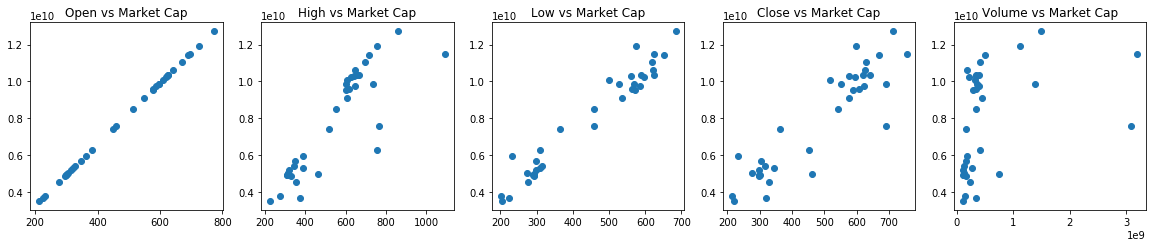

In [38]:
#Plot data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, MC)
plt.title('Open vs Market Cap')

plt.subplot(5,5,2)
plt.scatter(H, MC)
plt.title('High vs Market Cap')

plt.subplot(5,5,3)
plt.scatter(L, MC)
plt.title('Low vs Market Cap')

plt.subplot(5,5,4)
plt.scatter(C, MC)
plt.title('Close vs Market Cap')

plt.subplot(5,5,5)
plt.scatter(V, MC)
plt.title('Volume vs Market Cap')

plt.show

From data plot above that can be seen Market Cap has linear value with Open. So then, I try interpolate the value of Market Cap with Open value.

SyntaxError: invalid character in identifier (<ipython-input-73-05423ba77625>, line 3)